# Import libraries
Here we import all libraries or modules of these libraries required in the projectHere we import all libraries or modules of these libraries required in the project

In [2]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from datetime import date
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as mcm
import matplotlib.dates as mdates
import numpy as np

# See data
Here we analyze data to decide what charts can be displayed later

In [3]:
df = pd.read_csv('data/bfro_reports_geocoded.csv')
df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data pre-processing
Here we process the data to further plot the correct charts 

## Date data pre-processing

In [4]:
date_df = df[['date']].copy()
date_df.dropna(inplace=True)
date_df['Year'] = pd.to_datetime(date_df['date'], format='%Y-%m-%d').dt.year
date_df['Month'] = pd.to_datetime(date_df['date'], format='%Y-%m-%d').dt.month
date_df['Day'] = pd.to_datetime(date_df['date'], format='%Y-%m-%d').dt.day

this_year = date.today().year
date_df = date_df[date_df['Year'] < this_year]
date_df = date_df[date_df['Year'] > 1957]

month_dict = {
  1: 'January',
  2: 'February',
  3: 'March',
  4: 'April',
  5: 'May',
  6: 'June', 
  7: 'July',
  8: 'August',
  9: 'September',
  10: 'October',
  11: 'November',
  12: 'December'
}
date_df['Month'] = date_df['Month'].map(month_dict)

# Plots

In [5]:
def get_boxplot(df, feauture):
  if(is_numeric_dtype(df[feauture])):
    f = plt.figure() 
    f.set_figwidth(3.5) 
    f.set_figheight(5) 

    this_df = df[feauture]
    this_df.dropna(inplace=True)
    sns.boxplot(
      y=this_df.to_numpy(),
      showmeans=True,
      width=0.4,
      meanline=True,
      meanprops={'color': '#7ecfcd', 'ls': '-', 'lw': 2},
      medianprops={'color': '#2a3359', 'ls': '-', 'lw': 2},
    )
    
    mean_patch = mpatches.Patch(color='#7ecfcd', label='Mean')
    median_patch = mpatches.Patch(color='#2a3359', label='Median')
    plt.legend(handles=[mean_patch, median_patch], loc='lower right', frameon=False)
    sns.despine()

    plt.show()
  else:
    return "Numeric feauture required"

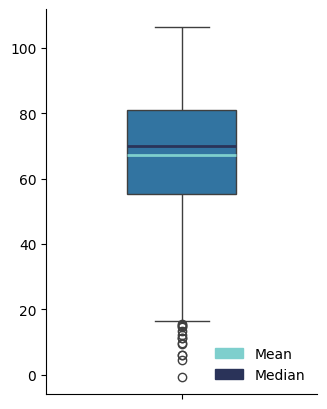

In [6]:
get_boxplot(df, 'temperature_high')

/tmp/ipykernel_6811/707907303.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mcm.get_cmap('viridis')
/tmp/ipykernel_6811/707907303.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(
/tmp/ipykernel_6811/707907303.py:7: UserWarning: The palette list has more values (144) than needed (64), which may not be intended.
  sns.barplot(


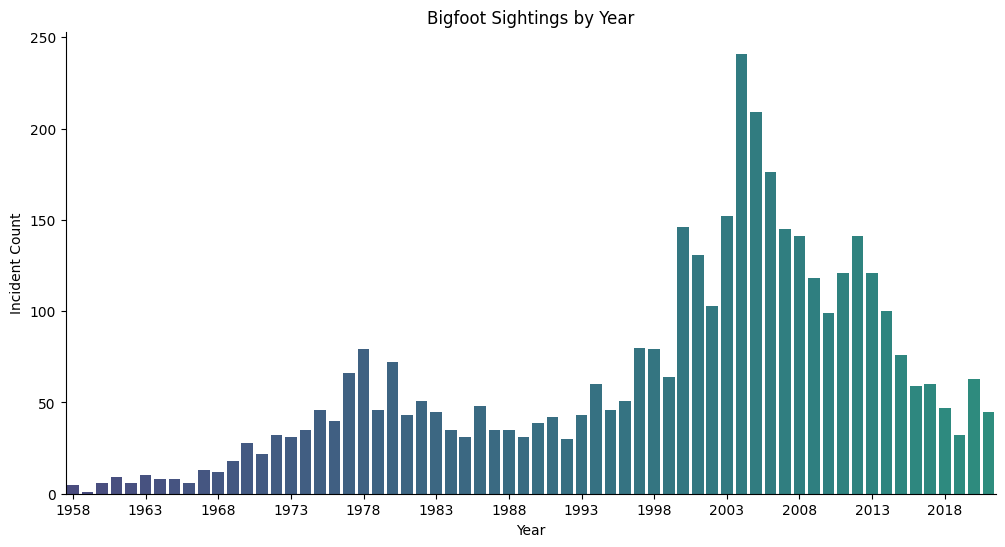

In [13]:
ax = date_df['Year'].value_counts().sort_index()

cmap = mcm.get_cmap('viridis')
colors = cmap(np.linspace(0.2, 1, len(ax.values) + 80))
plt.figure(figsize=(12, 6)) 

sns.barplot(
  x = ax.index,
  y = ax.values,
  palette=colors,
  hue=ax.index,
  legend=False
)

plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Bigfoot Sightings by Year')

plt.xticks(
  ticks=np.arange(0, len(ax.index), 5),
  labels=ax.index[::5]
)

sns.despine()

plt.show()

/tmp/ipykernel_6811/3610860149.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = mcm.get_cmap('viridis', 20)


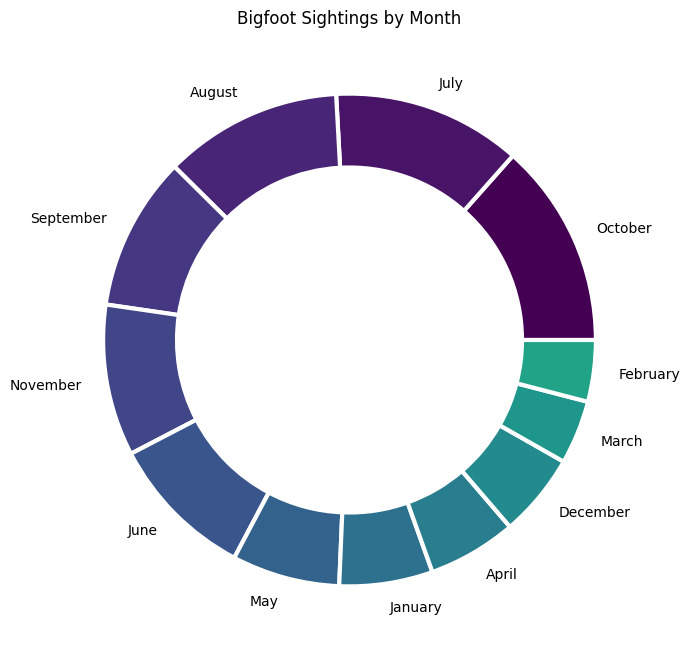

In [8]:
month_counts = date_df['Month'].value_counts()
colors = mcm.get_cmap('viridis', 20)

plt.figure(figsize=(10,8))
plt.pie(
  month_counts,
  labels = month_counts.index,
  colors=colors(range(12)),
  wedgeprops={
    'edgecolor': 'white',
    'width': 0.3,
    'linewidth': 3
  }
)
plt.title('Bigfoot Sightings by Month')
plt.show()

/tmp/ipykernel_6811/2500410433.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mcm.get_cmap('viridis')
/tmp/ipykernel_6811/2500410433.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.histplot(df, x="state", hue="state", palette=colors, legend=False)
/tmp/ipykernel_6811/2500410433.py:4: UserWarning: The palette list has more values (90) than needed (49), which may not be intended.
  sns.histplot(df, x="state", hue="state", palette=colors, legend=False)


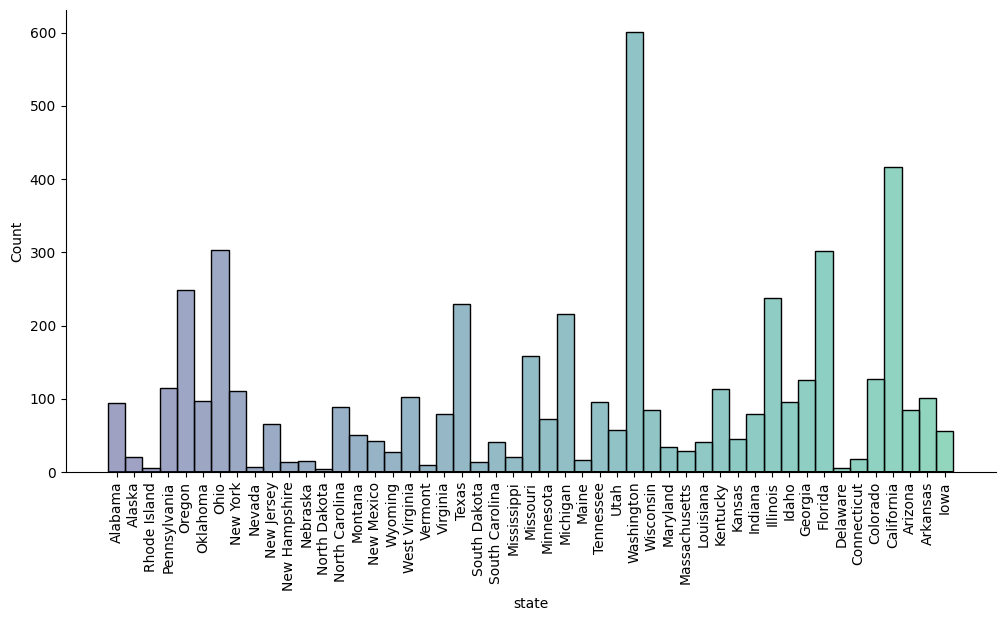

In [16]:
cmap = mcm.get_cmap('viridis')
colors = cmap(np.linspace(0.2, 1, 90))
plt.figure(figsize=(12, 6)) 
sns.histplot(df, x="state", hue="state", palette=colors, legend=False)
plt.xticks(rotation=90) 
sns.despine()
plt.show()

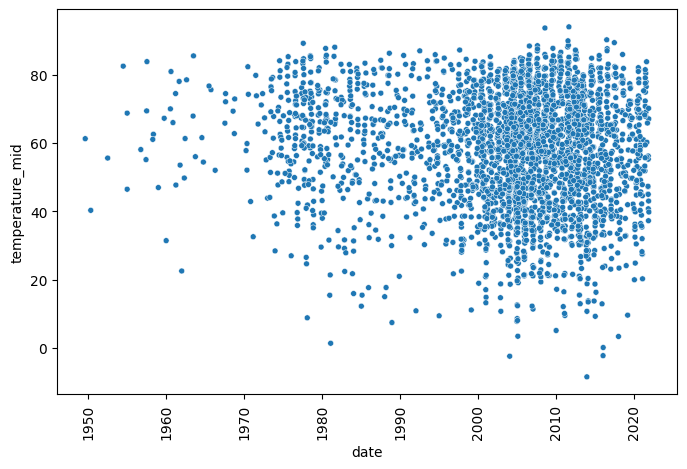

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['date'] = pd.to_datetime(df['date'])
sns.scatterplot(df, y='temperature_mid', x='date', size=3, legend=False)
plt.xticks(rotation=90)
plt.show()

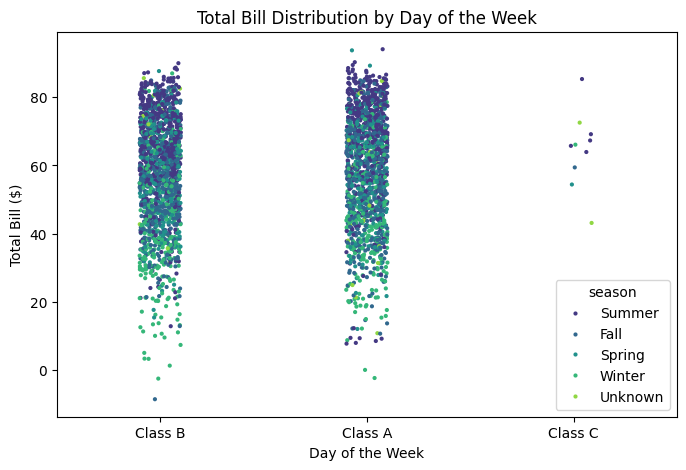

In [10]:
plt.figure(figsize=(8, 5))
sns.stripplot(df, x="classification", y="temperature_mid", palette="viridis", hue="season", size=3)
plt.title("Total Bill Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")
plt.show()

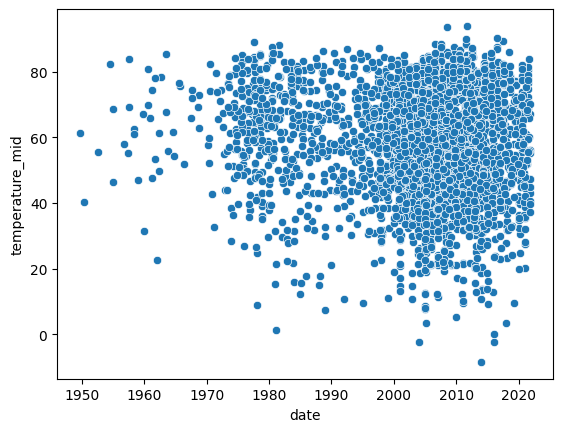

In [27]:
sns.scatterplot(df, x="date", y="temperature_mid")
plt.show()